# About Dataset heart_disease_data.csv

The dataset is in .csv (Comma Seperated Values) format and contains 200 rows with 14 features as explained below:
    1. Age: age of the patient (in years).
    2. sex: gender of the patient (1-Male, 0-Female).
    3. cp: chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic).
    4. trestbps: resting blood pressure (in mm Hg on admission to the hospital).
    5. chol: serum cholestoral in mg/dl.
    6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).
    7. restecg: resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy by Estes' criteria).
    8. thalach: maximum heart rate achieved.
    9. exang: exercise induced angina (1 = yes; 0 = no).
    10. oldpeak: ST depression induced by exercise relative to rest.
    11. slope: the slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping)
    12. ca: number of major vessels (0-3) colored by flourosopy.
    12. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    14. num: status of cancer in patient (presence value 1 to 4 and 0 for no cancer)
Since the target feature num is of categorical type, therefore, it is a classification problem.

# Loading Dataset

In [1]:
import pandas as pd
#Creating list of column names.
d_head = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

#Creating Dataframe of dataset
df_hd = pd.read_csv('heart_disease_data.csv',names=d_head)

#Displaying dataset
df_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


Remarks:
    
    -There are 200 rows and 14 features in this dataset.
    -Some of features contains value as '?' which needs to be treated accordingly.

# Preparing Dataset

In [2]:
#Replacing value '?' with null value and storing it into another variable.
import numpy as np
df=df_hd.copy()

df.replace('?',np.nan,inplace=True)

#Displaying dataset
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
#Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


Remarks:
    
    -There are 5 int type features and 9 object type features.
    -Object type features needs to be treated accordingly.
    -Null values are present in features:
        trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal
     and needs to be treated accordingly.

In [4]:
#Checking null values and displaying it's percentage w.r.t. total observation of feature
null_val = df.isnull().sum()
for i in null_val.keys():
    print("%-12s\t null_count: %4d\t (%%): %6.2f"%(i,null_val[i],(null_val[i]*100/len(df))))

age         	 null_count:    0	 (%):   0.00
sex         	 null_count:    0	 (%):   0.00
cp          	 null_count:    0	 (%):   0.00
trestbps    	 null_count:   56	 (%):  28.00
chol        	 null_count:    7	 (%):   3.50
fbs         	 null_count:    7	 (%):   3.50
restecg     	 null_count:    0	 (%):   0.00
thalach     	 null_count:   53	 (%):  26.50
exang       	 null_count:   53	 (%):  26.50
oldpeak     	 null_count:   56	 (%):  28.00
slope       	 null_count:  102	 (%):  51.00
ca          	 null_count:  198	 (%):  99.00
thal        	 null_count:  166	 (%):  83.00
num         	 null_count:    0	 (%):   0.00


Remarks:
    
    -Feature slope, ca, thal have more than 30% of null values, therefore dropping these features from dataset
     as treating them will be of no use.
    -Feature trestbps, chol, fbs, thalach, exang, oldpeak contains less than 30% of null values and can be treated
     according to their feature type.

In [5]:
#Dropping features slope, ca, thal from dataset
df_new=df.drop(columns=['slope','ca','thal'])
df_new.shape

(200, 11)

In [6]:
#Converting wrong data types i.e., object to numeric (feature oldpeak to float and all other to int)
for i in df_new.columns[df_new.dtypes == object]:
    df_new[i] = pd.to_numeric(df_new[i],errors='coerce')
    if i == 'oldpeak':
        continue
    df_new[i] = df_new[i].astype('Int64')
#Showing data types after conversion
df_new.dtypes

age           int64
sex           int64
cp            int64
trestbps      Int64
chol          Int64
fbs           Int64
restecg       int64
thalach       Int64
exang         Int64
oldpeak     float64
num           int64
dtype: object

In [7]:
#Replacing null values of features with median of the feature as
#median is less effected by the presence of outliers as compared to mean
null_val = df_new.isnull().sum()
for i in null_val.keys():
    if null_val[i]>0:
        df_new[i].replace(np.nan,df_new[i].median(),inplace=True)
        
#Rechecking null values
df_new.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

Remarks:
    
    -No null values are present

# Statistical Summary

In [8]:
#Checking statistical summary of dataset
df_new.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,132.710000,180.050000,0.340000,0.735000,122.055000,0.740000,1.371000,1.520000
std,7.811697,0.171015,0.795701,18.335947,112.221727,0.474898,0.683455,18.876269,0.439735,0.941216,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,4.000000


Remarks:
    
    -Count is similer for all features which indicates no null values are present.
    -Mean is less than median in chol which indicates presence of skewness in it.
    -Standard Deviation is higher in chol which indicates data is spreaded in it.
    -The difference between 75th percentile and max is there in chol which indicates presence of outliers in it.

# Exploratory Data Analysis (EDA)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis

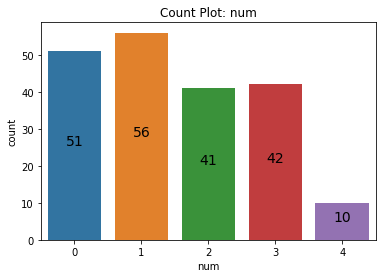

In [10]:
#Checking target feature num using count plot
x='num'
ax=sns.countplot(df_new[x])
k=0
for i in ax.patches:
    h = i.get_height()
    ax.text(k,h/2,h,ha='center',fontsize=14)
    k += 1
plt.title(f"Count Plot: {x}")
plt.show()

Remarks:

    -Maximum number of observations are for num 1 and for 4 is minimum.
    -Majority of observations are between 0 to 3 of num.

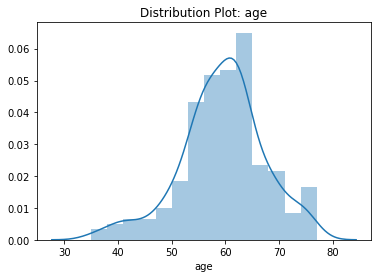

Feature Statistics:
	Mean: 59.35	Median: 60.0	STD: 7.811697194933158	Skew: -0.40409057876389015


In [11]:
#Checking feature age using distribution plot.
x='age'
sns.distplot(df_new[x])
plt.title(f"Distribution Plot: {x}")
plt.show()
print("Feature Statistics:")
print(f"\tMean: {df_new[x].mean()}\tMedian: {df_new[x].median()}\tSTD: {df_new[x].std()}\tSkew: {df_new[x].skew()}")

Remarks:

    -Data is somewhat normally distributed but not in bell curve.
    -Negligiable amount of skewness is there in data.
    -Observations are of patients between age of 30 to 80.

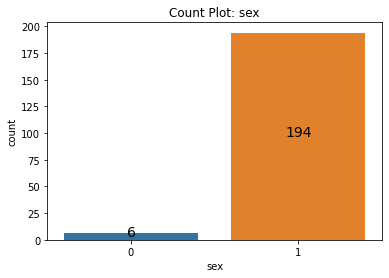

In [12]:
#Checking feature sex using count plot.
x='sex'
ax=sns.countplot(df_new[x])
k=0
for i in ax.patches:
    h = i.get_height()
    ax.text(k,h/2,h,ha='center',fontsize=14)
    k += 1
plt.title(f"Count Plot: {x}")
plt.show()

Remarks:
    
    -Most of the observations are of Male patients.

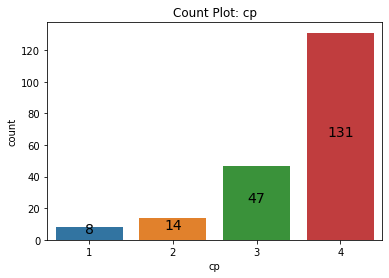

In [13]:
#Checking feature cp using count plot.
x='cp'
ax=sns.countplot(df_new[x])
k=0
for i in ax.patches:
    h = i.get_height()
    ax.text(k,h/2,h,ha='center',fontsize=14)
    k += 1
plt.title(f"Count Plot: {x}")
plt.show()

Remarks:

    -Maximum number of observations are for cp 4.
    -Minimum number of observations are for cp 1.

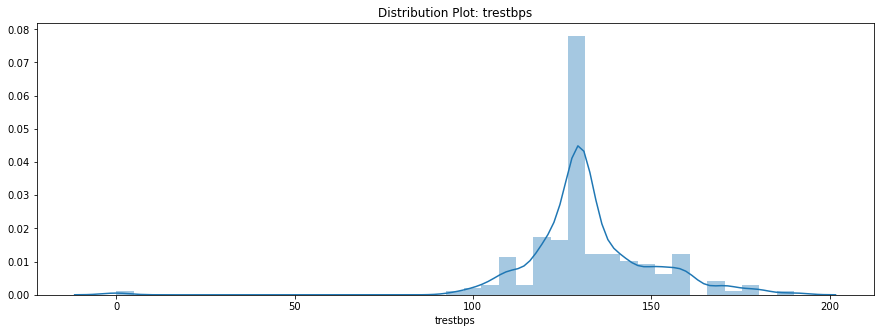

Feature Statistics:
	Mean: 132.71	Median: 130.0	STD: 18.33594651697498	Skew: -1.320143958663686


In [14]:
#Checking feature trestbps using distribution plot.
x='trestbps'
plt.figure(figsize=(15,5))
sns.distplot(df_new[x])
plt.title(f"Distribution Plot: {x}")
plt.show()
print("Feature Statistics:")
print(f"\tMean: {df_new[x].mean()}\tMedian: {df_new[x].median()}\tSTD: {df_new[x].std()}\tSkew: {df_new[x].skew()}")

Remarks:
    
    -Data is not distributed normally.
    -Maximum number of observations are from patients having trestbps 130.
    -Majority of observations are from 120 to 150 of trestbps.

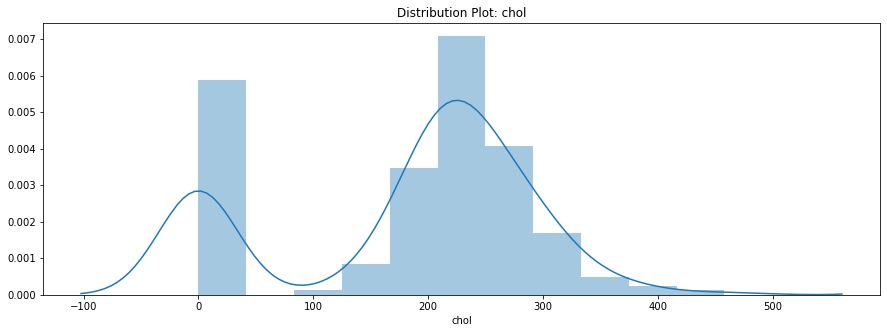

Feature Statistics:
	Mean: 180.05	Median: 216.0	STD: 112.22172730983074	Skew: -0.6025838825294734


In [15]:
#Checking feature chol using distribution plot.
x='chol'
plt.figure(figsize=(15,5))
sns.distplot(df_new[x])
plt.title(f"Distribution Plot: {x}")
plt.show()
print("Feature Statistics:")
print(f"\tMean: {df_new[x].mean()}\tMedian: {df_new[x].median()}\tSTD: {df_new[x].std()}\tSkew: {df_new[x].skew()}")

Remarks:
    
    -Data is somewhat distributed normally but not in bell curve.
    -Most of the observations are between 170 to 320 of chol.

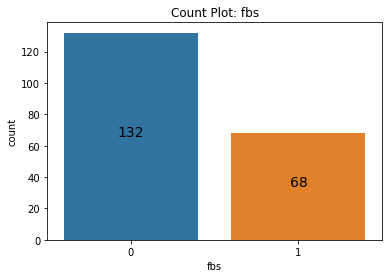

In [16]:
#Checking feature fbs using count plot.
x='fbs'
ax=sns.countplot(df_new[x])
k=0
for i in ax.patches:
    h = i.get_height()
    ax.text(k,h/2,h,ha='center',fontsize=14)
    k += 1
plt.title(f"Count Plot: {x}")
plt.show()

Remarks:
    
    -Most of the observations are for fbs 0.

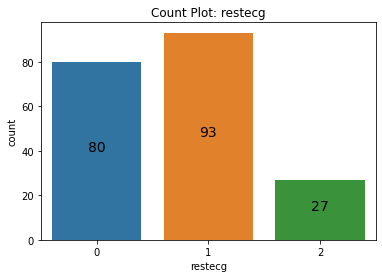

In [17]:
#Checking feature restecg using count plot.
x='restecg'
ax=sns.countplot(df_new[x])
k=0
for i in ax.patches:
    h = i.get_height()
    ax.text(k,h/2,h,ha='center',fontsize=14)
    k += 1
plt.title(f"Count Plot: {x}")
plt.show()

Remarks:
    
    -Maximum number of observations are for restecg 1.
    -Minimum number of observations are for restecg 2.
    -Majority of observations are for restecg 0 and 1.

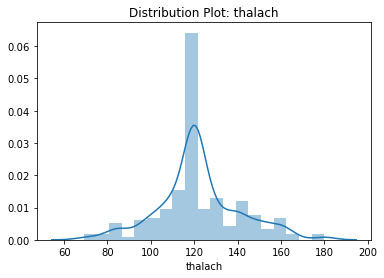

Feature Statistics:
	Mean: 122.055	Median: 120.0	STD: 18.87626930072698	Skew: 0.26568941922059836


In [18]:
#Checking feature thalach using distribution plot.
x='thalach'
sns.distplot(df_new[x])
plt.title(f"Distribution Plot: {x}")
plt.show()
print("Feature Statistics:")
print(f"\tMean: {df_new[x].mean()}\tMedian: {df_new[x].median()}\tSTD: {df_new[x].std()}\tSkew: {df_new[x].skew()}")

Remarks:
    
    -Data is somewhat distributed normally but not in bell curve.
    -Maximum number of observations are for thalach 120.
    -Majority of observations are between 100 to 150 of thalach.

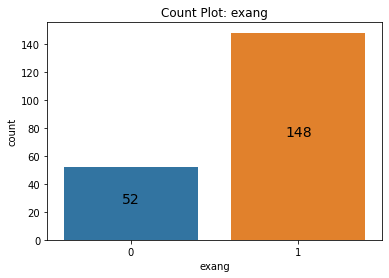

In [19]:
#Checking feature exang using count plot.
x='exang'
ax=sns.countplot(df_new[x])
k=0
for i in ax.patches:
    h = i.get_height()
    ax.text(k,h/2,h,ha='center',fontsize=14)
    k += 1
plt.title(f"Count Plot: {x}")
plt.show()

Remarks:
    
    -Majority of observations are for exang 1.

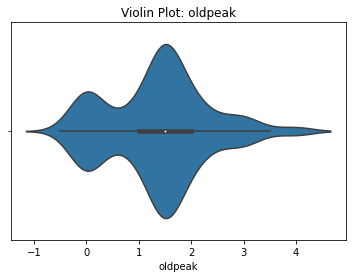

Feature Statistics:
	Mean: 1.371	Median: 1.5	STD: 0.9412164693687927	Skew: 0.2590515905226455


In [20]:
#Checking feature oldpeak using violin plot.
x='oldpeak'
sns.violinplot(df_new[x])
plt.title(f"Violin Plot: {x}")
plt.show()
print("Feature Statistics:")
print(f"\tMean: {df_new[x].mean()}\tMedian: {df_new[x].median()}\tSTD: {df_new[x].std()}\tSkew: {df_new[x].skew()}")

Remarks:
    
    -Most of the observations are between 1 and 2 of oldpeak.

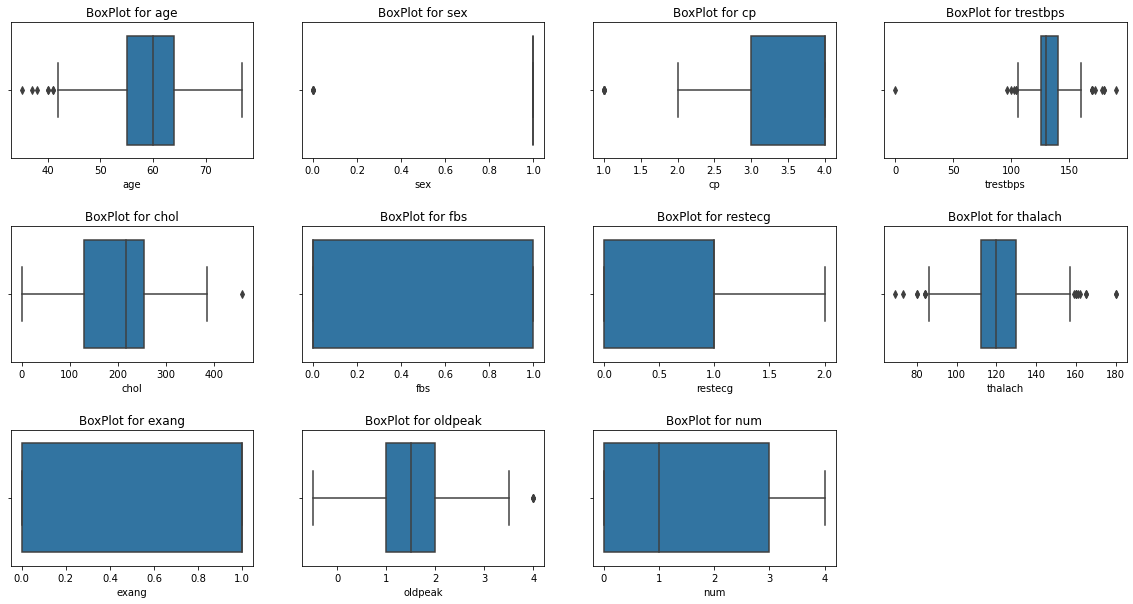

In [21]:
#Checking features with boxplot
cols = 4
rows = len(df_new.columns)//cols
if rows % cols != 0:
    rows += 1
 
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
k=1
for x in df_new.columns:
    ax = fig.add_subplot(rows,cols,k)
    sns.boxplot(df_new[x],ax=ax)
    ax.set_title(f"BoxPlot for {x}")
    
    k += 1
    
plt.show()

Remarks:

    -Box plot shows presence of outliers in features:
        age, trestbps, chol, thalach, oldpeak
     and needs to be treated accordingly.

# Bi-Variate Analysis

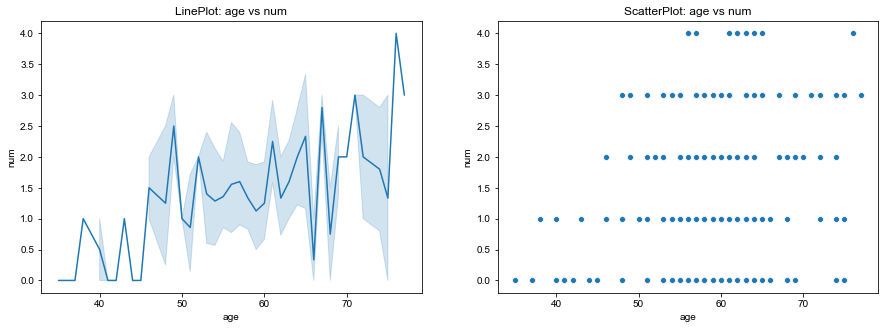

In [22]:
#Checking feature age with target num
x='age'
y='num'
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.set_style('whitegrid')
#using lineplot
sns.lineplot(x,y,data=df_new,ax=ax1)
ax1.set_title(f"LinePlot: {x} vs {y}")

#using scatterplot
sns.scatterplot(x,y,data=df_new,ax=ax2)
ax2.set_title(f"ScatterPlot: {x} vs {y}")

plt.show()

Remarks:
    
    -With the increase in age, num also increases.
    -For num 0, majority of age lies between 53 to 67.
    -For num 1, majority of age lies between 53 to 67.
    -For num 2, majority of age lies between 55 to 65.
    -For num 3, majority of age lies between 53 to 66.
    -For num 4, majority of age lies between 61 to 65.

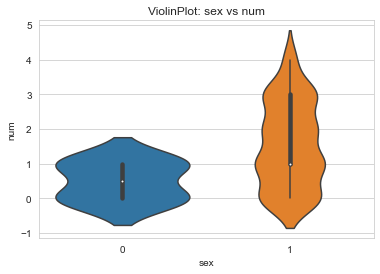

num,0,1,2,3,4
sex,,,,,
0,3,3,0,0,0
1,48,53,41,42,10


In [23]:
#Checking feature sex with target num
x='sex'
y='num'

#using violinplot
sns.violinplot(x,y,data=df_new)
plt.title(f"ViolinPlot: {x} vs {y}")
plt.show()

#using crosstab
cnc = pd.crosstab(df_new[x],df_new[y])
cnc

Remarks:
    
    -In sex 0, only num 0 and 1 are present.
    -In sex 1, 0 to 4 num are present.
    -In sex 1, majority of num are between 1 to 3.

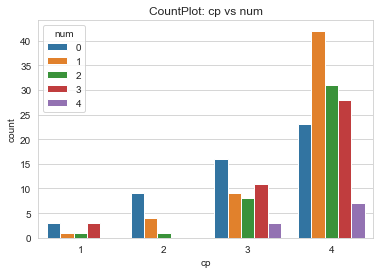

num,0,1,2,3,4
cp,,,,,
1,3,1,1,3,0
2,9,4,1,0,0
3,16,9,8,11,3
4,23,42,31,28,7


In [24]:
#Checking feature cp with target num
x='cp'
y='num'

#using countplot
sns.countplot(x,hue=y,data=df_new)
plt.title(f"CountPlot: {x} vs {y}")
plt.show()

#using crosstab
cnc = pd.crosstab(df_new[x],df_new[y])
cnc

Remarks:
    
    -Maximum number of patient with cp 1 are of num 0 and 3.
    -Maximum number of patient with cp 2 are of num 0.
    -Maximum number of patient with cp 3 are of num 0.
    -Maximum number of patient with cp 4 are of num 1.
    
    -Minimum number of patient with cp 1 are of num 4.
    -Minimum number of patient with cp 2 are of num 3 and 4.
    -Minimum number of patient with cp 3 are of num 4.
    -Minimum number of patient with cp 4 are of num 4.

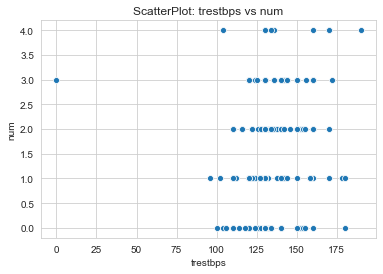

In [25]:
#Checking trestbps with target num using scatterplot
x='trestbps'
y='num'
sns.scatterplot(x,y,data=df_new)
plt.title(f"ScatterPlot: {x} vs {y}")
plt.show()

Remarks:
    
    -Most of num 0 lies between 100 to 130 trestbps.
    -Most of num 1 lies between 120 to 145 trestbps.
    -Most of num 2 lies between 125 to 155 trestbps.
    -Most of num 3 lies between 120 to 160 trestbps.
    -Most of num 4 lies between 130 to 140 trestbps.

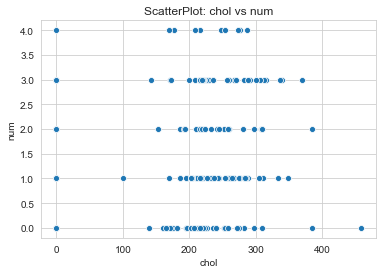

In [26]:
#Checking chol with target num using scatterplot
x='chol'
y='num'
sns.scatterplot(x,y,data=df_new)
plt.title(f"ScatterPlot: {x} vs {y}")
plt.show()

Remarks:
    
    -Most of num 0 lies between 160 to 280 chol.
    -Most of num 1 lies between 180 to 290 chol.
    -Most of num 2 lies between 210 to 260 chol.
    -Most of num 3 lies between 200 to 240 and 280 to 320 chol.
    -Most of num 4 ranges between 170 to 290 chol.

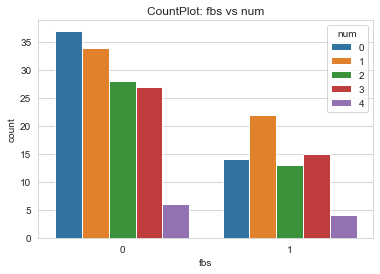

num,0,1,2,3,4
fbs,,,,,
0,37,34,28,27,6
1,14,22,13,15,4


In [27]:
#Checking feature fbs with target num
x='fbs'
y='num'

#using countplot
sns.countplot(x,hue=y,data=df_new)
plt.title(f"CountPlot: {x} vs {y}")
plt.show()

#using crosstab
cnc = pd.crosstab(df_new[x],df_new[y])
cnc

Remarks:
    
    -Majority of patients are with fbs 0.
    -In fbs 0, maximum number of patient are of num 0 and minimum are of num 4.
    -In fbs 1, maximum number of patient are of num 1 and minimum are of num 4.

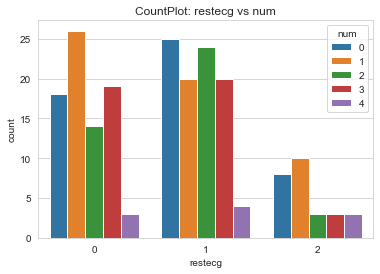

num,0,1,2,3,4
restecg,,,,,
0,18,26,14,19,3
1,25,20,24,20,4
2,8,10,3,3,3


In [28]:
#Checking feature restecg with target num
x='restecg'
y='num'

#using countplot
sns.countplot(x,hue=y,data=df_new)
plt.title(f"CountPlot: {x} vs {y}")
plt.show()

#using crosstab
cnc = pd.crosstab(df_new[x],df_new[y])
cnc

Remarks:

    -Majority of patients are of restecg 0 and 1.
    -For restecg 0, maximum number of patients are of num 1 and minimum are of num 4.
    -For restecg 1, maximum number of patients are of num 0 and minimum are of num 4.
    -For restecg 2, maximum number of patients are of num 1 and minimum are of num 2,3,4.

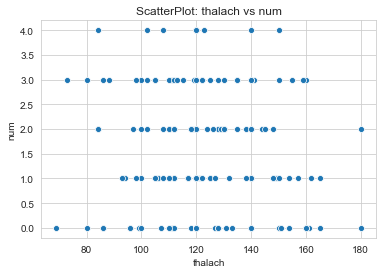

In [29]:
#Checking thalach with target num using scatterplot
x='thalach'
y='num'
sns.scatterplot(x,y,data=df_new)
plt.title(f"ScatterPlot: {x} vs {y}")
plt.show()

Remarks:
    
    -For num 0, thalach mostly ranges from 80 to 165.
    -For num 1, thalach mostly ranges from 92 to 165.
    -For num 2, thalach mostly ranges from 98 to 148.
    -For num 3, thalach mostly ranges from 80 to 160.
    -For num 4, thalach mostly ranges from 83 to 150.

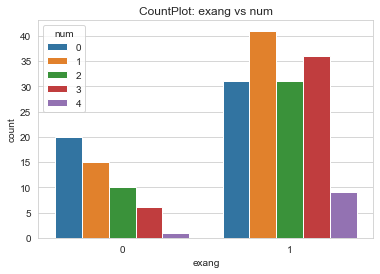

num,0,1,2,3,4
exang,,,,,
0,20,15,10,6,1
1,31,41,31,36,9


In [30]:
#Checking feature exang with target num
x='exang'
y='num'

#using countplot
sns.countplot(x,hue=y,data=df_new)
plt.title(f"CountPlot: {x} vs {y}")
plt.show()

#using crosstab
cnc = pd.crosstab(df_new[x],df_new[y])
cnc

Remarks:
    
    -Majority of patients are of exang 1.
    -For exang 0, maximum number of patients are of num 0 and minimum are of num 4.
    -For exang 1, maximum number of patients are of num 1 and minimum are of num 4.

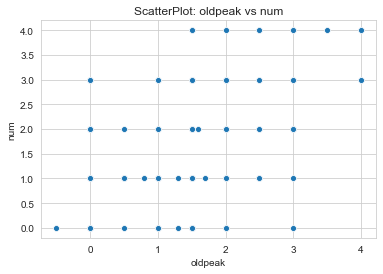

In [31]:
#Checking oldpeak with target num using scatterplot
x='oldpeak'
y='num'
sns.scatterplot(x,y,data=df_new)
plt.title(f"ScatterPlot: {x} vs {y}")
plt.show()

Remarks:
    
    -For num 0, oldpeak ranges from -0.8 to 3.
    -For num 1, oldpeak ranges from 0 to 3.
    -For num 2, oldpeak ranges from 0 to 3.
    -For num 3, oldpeak ranges from 0 to 4.
    -For num 4, oldpeak ranges from 1.5 to 4.

# Multi-Variate Analysis

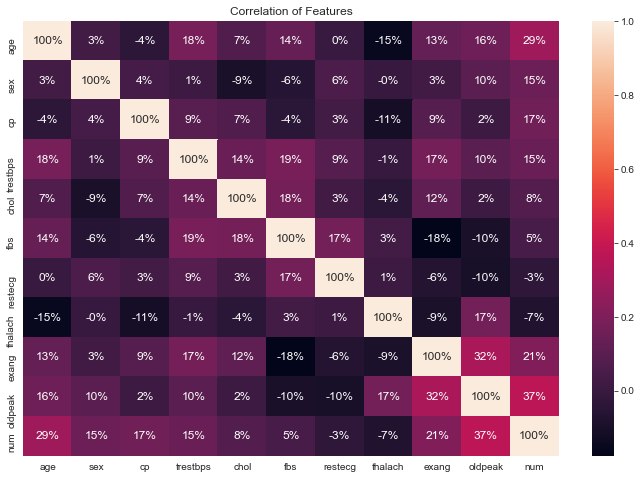

In [32]:
#Checking correlation of features
df_corr = df_new.corr()

#Displaying correlation using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True,fmt='.0%',annot_kws={"size":12})
plt.title("Correlation of Features")
plt.show()

Remarks:
    
    -Feature age, sex, cp, testbps, exang and oldpeak shows strong correlation with target feature num while other feature
    shows weak correlation with target.

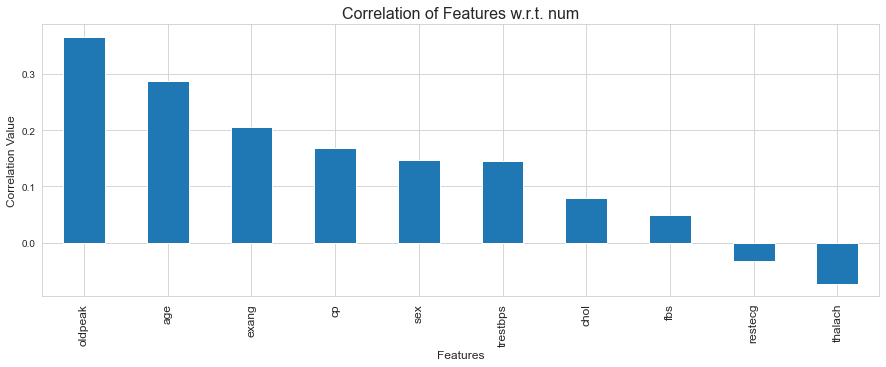

In [33]:
#Ploting correlation of features w.r.t. target num using bar plot.
plt.figure(figsize=(15,5))
df_corr['num'].sort_values(ascending=False).drop('num').plot.bar()
plt.title('Correlation of Features w.r.t. num',fontsize=16)
plt.ylabel('Correlation Value',fontsize=12)
plt.xlabel('Features',fontsize=12)
plt.xticks(fontsize=12)
plt.show()

Remarks:
    
    -From feature oldpeak to fbs (left to right), there is a positive correlation.
    -Feature restecg and thalach shows negative correlation.

# Preparing Data for Model Training

# 1. Removing Outliers

In [34]:
#Checking and removing outliers using zscore (threshold value -3 to +3)
from scipy.stats import zscore
z = np.abs(zscore(np.array(df_new,dtype=np.float64)))

#Removing outliers
df_wo = df_new[(z<=3).all(axis=1)]

print(f"Original Shape: {df_new.shape}")
print(f"New Shape: {df_wo.shape}")
print(f"% Loss: {(len(df_new)-len(df_wo))*100/len(df_new)}")

Original Shape: (200, 11)
New Shape: (181, 11)
% Loss: 9.5


Remarks:
    
    -Since % Loss of data is more than 5, therefore discarding the outlier removal and proceeding with original data.

# 2. Seperating Input and Output/Target Variable

In [36]:
x = df_new.drop(columns=['num']) #Input variable
y = df_new['num'] #Target variable

print(x.shape)
print(y.shape)

(200, 10)
(200,)


# 3. Skewness

In [37]:
#Checking skewness of data
x.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.320144
chol       -0.602584
fbs         0.680636
restecg     0.391463
thalach     0.265689
exang      -1.102593
oldpeak     0.259052
dtype: float64

Remarks:
    
    -Feature sex, cp, chol, exang has skewness and needs to be treated.

In [38]:
#Treating skewness
from sklearn.preprocessing import power_transform
x_t = power_transform(x)

# 4. Scaling Data for Model Training

In [39]:
#Scaling contineous data for model training
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

scaled_x = sc.fit_transform(x_t)

# Finding Best Model

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings

warnings.simplefilter('ignore')

In [46]:
#Defining function for best random state
def get_best_rstate(r,model,x,y,test_size=0.25):
    best_rState = 0
    best_mScore = 0
    for i in r:
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=i)
        
        model.fit(x_train,y_train)
        predict_y = model.predict(x_test)
        
        temp_aScore = accuracy_score(y_test,predict_y)
        if temp_aScore>best_mScore:
            best_mScore = temp_aScore
            best_rState = i
                
    return best_rState,best_mScore


#Defining function for best CV
def get_best_cv(model,parameters,x_train,y_train,r=range(2,20)):
    best_cv = 0
    best_cvScore = 0
    for i in r:
        gscv = GridSearchCV(model,parameters)
        gscv.fit(x_train,y_train)
        
        temp_cvScore = cross_val_score(gscv.best_estimator_,x_train,y_train,cv=i).mean()
        if temp_cvScore>best_cvScore:
            best_cvScore = temp_cvScore
            best_cv = i
            
    return best_cv,best_cvScore

#Defining function for building models
def build_model(models,x,y,r_range=range(100),t_size=0.25,cv_range=range(2,20)):
    for i in models:
        print(f"Processing {i}...")
        #Finding the best random_state for train test split
        best_rState, best_mScore = get_best_rstate(r_range,models[i]["name"],x,y)
        
        #Splitting train test data with best random_state
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=t_size,random_state=best_rState)
        
        #Hypertuning Parameters
        #Finding best CV
        best_cv, best_cvScore = get_best_cv(models[i]["name"],models[i]["parameters"],x_train,y_train,cv_range)
        
        #Building final model with hypertuned parameters
        gscv = GridSearchCV(models[i]["name"],models[i]["parameters"],cv=best_cv)
        gscv.fit(x_train,y_train)
        
        #Checking Final Performance of the model
        predict_y = gscv.best_estimator_.predict(x_test)
        
        aScore = accuracy_score(y_test,predict_y)
        cMatrix = confusion_matrix(y_test,predict_y)
        cReport = classification_report(y_test,predict_y)
        
        #Storing metrics
        models[i]['initial_accuracy_score'] = best_mScore
        models[i]['accuracy_score'] = aScore
        models[i]['confusion_matrix'] = cMatrix
        models[i]['classification_report'] = cReport
        
        #Storing model specs.
        models[i]["random_state"] = best_rState
        models[i]["x_train"] = x_train
        models[i]["x_test"] = x_test
        models[i]["y_train"] = y_train
        models[i]["y_test"] = y_test
        models[i]["cv"] = best_cv
        models[i]["cross_val_score"] = best_cvScore
        models[i]["gscv"] = gscv
        models[i]["predict_y"] = predict_y
        
        print(f"\tCompleted...\n")
    return models;

In [48]:
#Preparing List of Models and Testing them to get best model.
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

#List of models with parameters
models = {
    "GaussianNB":{
        "name": GaussianNB(),
        "parameters": {
            "var_smoothing": [1e-9,1e-8]
        }
    },
    "DecisionTreeClassifier":{
        "name": DecisionTreeClassifier(),
        "parameters":{
            "criterion": ['gini','entropy'],
            "splitter": ['best','random']            
        }
    },
    "RandomForestClassifier":{
        "name": RandomForestClassifier(),
        "parameters":{
            "criterion": ['gini','entropy'],
            "max_features": ['auto','sqrt','log2']
        }
    },
    "AdaBoostClassifier":{
        "name": AdaBoostClassifier(),
        "parameters":{
            "n_estimators": [50,100],
            "algorithm": ['SAMME','SAMME.R']
        }
    }
}

#Testing models and storing results
build_models = build_model(models,scaled_x,y)

Processing GaussianNB...
	Completed...

Processing DecisionTreeClassifier...
	Completed...

Processing RandomForestClassifier...
	Completed...

Processing AdaBoostClassifier...
	Completed...



In [49]:
#Displaying model performance and comparing it to select best model.
model_names = []
model_aScores = []
model_cvScores = []
for i in build_models:
    model = build_models[i]
    print(f"START: {i}\n")
    print(f"\tBest random_state: {model['random_state']} with best accuracy_score: {model['initial_accuracy_score']}\n")
    print(f"\tBest CV: {model['cv']} with best cross_val_score: {model['cross_val_score']}\n")
    print(f"\tBest Parameters: {model['gscv'].best_params_}\n\n")
    print(f"----Final Performance----")
    print(f"Accuracy Score: {round(model['accuracy_score']*100,2)}%\n")
    print(f"Confusion Matix:\n{model['confusion_matrix']}\n")
    print(f"Classification Report:\n{model['classification_report']}\n")
    print(f"END: {i}\n\n\n")
    
    model_names.append(i)
    model_aScores.append(model['accuracy_score'])
    model_cvScores.append(model['cross_val_score'])
    
df_cmp = pd.DataFrame({"Name":model_names,"accuracy_score":model_aScores,"cross_val_score":model_cvScores})
df_cmp['Difference'] = df_cmp['accuracy_score']-df_cmp['cross_val_score']
df_cmp

START: GaussianNB

	Best random_state: 82 with best accuracy_score: 0.4

	Best CV: 5 with best cross_val_score: 0.16666666666666669

	Best Parameters: {'var_smoothing': 1e-09}


----Final Performance----
Accuracy Score: 40.0%

Confusion Matix:
[[ 0  0  7  4  1]
 [ 0  0  8  2  0]
 [ 0  0 11  1  0]
 [ 0  0  4  8  1]
 [ 0  0  0  2  1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        10
           2       0.37      0.92      0.52        12
           3       0.47      0.62      0.53        13
           4       0.33      0.33      0.33         3

    accuracy                           0.40        50
   macro avg       0.23      0.37      0.28        50
weighted avg       0.23      0.40      0.28        50


END: GaussianNB



START: DecisionTreeClassifier

	Best random_state: 95 with best accuracy_score: 0.46

	Best CV: 4 with best cross_val_score: 0.33997

,Name,accuracy_score,cross_val_score,Difference
0,GaussianNB,0.40,0.166667,0.233333
1,DecisionTreeClassifier,0.42,0.339972,0.080028
2,RandomForestClassifier,0.42,0.326667,0.093333
3,AdaBoostClassifier,0.38,0.320656,0.059344


Remarks:
    -From all the tested models, DicisionTreeClassifier performs better with small difference between
 accuracy_score of 42.00% and cross_val_score of 33.99%, therefore proceeding with DicisionTreeClassifier.

# Model Saving or Serialization

In [51]:
import joblib
filename = "heart_disease_project.pkl"
final_model = build_models['DecisionTreeClassifier']
joblib.dump(final_model['gscv'].best_estimator_,open(filename,'wb'))

# Conclusion

In [53]:
#Comparing Original data with Predicted data
cmp = pd.DataFrame({"Original":np.array(final_model['y_test']),"Predicted":np.array(final_model['predict_y'])})
cmp

,Original,Predicted
0,1,2
1,3,0
2,3,3
3,0,0
4,4,1
5,3,3
6,1,0
7,3,1
8,1,3
9,2,2


# Final Remarks:
    DecisionTreeClassifier performs below average with an accuracy of 42.00% and can be further increased by training with more specific data.